<a href="https://colab.research.google.com/github/DharmikPatel916/CE888/blob/main/Praticals/Week%203/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Systems

In [176]:
# Loading Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
# Loading data
col_names = ['JokeCount'] + [f'Joke{num + 1}' for num in range(100)]
df_jokes = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header= None, names=col_names)

In [178]:
df_jokes.head()

,JokeCount,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [179]:
print(len(df_jokes))

24983


In [180]:
# replace 99 value to NaN
df_jokes = df_jokes.replace(to_replace=99, value= np.nan)
df_jokes.head()

,JokeCount,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [181]:
df_jokes = df_jokes.drop(columns=['JokeCount'])
df_jokes.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [182]:
ranking = df_jokes.rank(axis=1, method='average')

In [183]:
mean_result = df_jokes.mean(axis = 0, skipna = True)
print(mean_result)

Joke1      0.904573
Joke2      0.208460
Joke3      0.316574
Joke4     -1.449114
Joke5      0.403556
             ...   
Joke96     1.528003
Joke97     1.673750
Joke98     0.767692
Joke99    -0.031244
Joke100    1.354711
Length: 100, dtype: float64


In [184]:
print(mean_result.min() )
print("Worst rated joke: ",mean_result.idxmin() )
print(mean_result.max() )
print("Best rated joke: ",mean_result.idxmax() )

-3.8338796373689923
Worst rated joke:  Joke58
3.6650848950824937
Best rated joke:  Joke50


In [185]:
arr= df_jokes.values

In [186]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape) ## rated[0] is the indices for rows and rated[1] is the indices of columns

2498300 (2498300,)


In [187]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(arr))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [188]:
new_arr, idx = replace(arr, 0.1)

In [189]:
print(new_arr)

[[-7.82  8.79 -9.66 ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [  nan   nan   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]


In [190]:
print(idx)

(array([16476,  7552,  1182, ...,   888,  2069, 10168]), array([22, 10, 36, ..., 43, 64, 11]))


In [191]:
print(rated)

(array([    0,     0,     0, ..., 24982, 24982, 24982]), array([ 0,  1,  2, ..., 97, 98, 99]))


In [192]:
arr[idx[0][0], idx[1][0]]

-4.51

In [193]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [194]:
print(new_arr.shape[0])

24983


In [195]:
print(new_arr.shape[1])

100


In [196]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [197]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)

def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating!=99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 5) == 0:
            print('Iteration %d/%d: \t MSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/50: 	 MSE=26.257099
Iteration 5/50: 	 MSE=24.345641
Iteration 10/50: 	 MSE=23.260633
Iteration 15/50: 	 MSE=22.249814
Iteration 20/50: 	 MSE=21.347968
Iteration 25/50: 	 MSE=20.326972
Iteration 30/50: 	 MSE=18.958177
Iteration 35/50: 	 MSE=17.897356
Iteration 40/50: 	 MSE=17.453110
Iteration 45/50: 	 MSE=17.276101


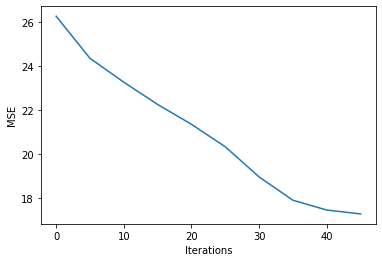

In [198]:
num_iter = 50
hist = sgd(num_iter) # Note MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0 , num_iter, 5), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [199]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.76799974, -4.51476576, -5.55482796, ..., -2.23183785,
        -5.34584901, -2.22004874],
       [ 3.09994403,  3.50027214,  3.98056159, ...,  2.49167372,
         3.76018616,  2.67851595],
       [ 6.06321208,  6.30692547,  6.30053726, ...,  6.52517848,
         5.7474332 ,  7.38583141],
       ...,
       [ 0.07127561,  0.08703529,  0.10957448, ...,  0.03721361,
         0.10599125,  0.03549034],
       [-0.06029305, -0.21204595, -0.47387081, ...,  0.39246355,
        -0.50217159,  0.52102714],
       [ 2.88380756,  2.81740084,  2.49461181, ...,  3.6619283 ,
         2.19027345,  4.23869332]])

In [202]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_jokes.columns

In [203]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,"(-7.82, -3.767999738045116)","(8.79, -4.514765755264963)","(-9.66, -5.554827955780868)","(-8.16, -9.347974906913281)","(-7.52, -2.9156988702306585)","(-8.5, -1.8337180711460173)","(-9.85, -5.265459094516412)","(4.17, -4.341629045072679)","(-8.98, -8.353069523840487)","(-4.76, -3.6538693591557703)","(-8.5, -1.868611008790244)","(-6.75, -2.099615296053155)","(-7.18, -6.809953013176308)","(8.45, -2.025538731012976)","(-7.18, -6.692254402896814)","(-7.52, -10.043421458835349)","(-7.43, -4.827267148702043)","(-9.81, -5.3304761856380924)","(-9.85, -3.951620735516253)","(-9.85, -6.243378743402368)","(-9.37, -0.13787471179055882)","(1.5, -4.516448131315172)","(-4.37, -6.1678416517014805)","(99.0, -10.1940377095284)","(-8.5, -5.0149916566767265)","(1.12, -2.1449753804703064)","(7.82, 3.1772814824983904)","(2.86, -1.863782879460459)","(99.0, 3.1439084570551077)","(-7.43, -7.826209119592461)","(2.14, 0.6959758823382601)","(-4.08, 3.054698887126674)","(-9.08, -9.266584443528975)","(7.82, -3.2147660806765703)","(5.05, 2.5228174868578157)","(99.0, 3.4479148384492704)","(-9.17, -8.936812029215716)","(-8.4, -3.5263578974428618)","(-8.4, -3.031654785871711)","(-8.4, -3.974859484471144)",...,"(8.59, 0.948603676957264)","(99.0, 2.0150972307138018)","(-6.84, -5.397997871911263)","(-9.03, -8.123192185744765)","(2.82, 0.9489658540544665)","(-1.36, 1.2259124415398)","(-9.08, -8.612198599983666)","(8.3, 1.5342674453585685)","(5.68, 1.4662750394291524)","(-4.81, -4.769767832128258)","(nan, -5.7731642195434345)","(nan, 1.4359887664659503)","(nan, -2.524309357050181)","(nan, -8.055032519083943)","(nan, -5.138129406592868)","(nan, 1.0466478079142483)","(nan, -3.0974742193325744)","(-9.42, -1.4103289137740596)","(nan, -4.37336699079273)","(nan, -1.909787292542006)","(nan, -0.8060679019454702)","(-7.72, -3.4962371931053604)","(nan, 0.18131995629081105)","(nan, -3.8724528728336773)","(nan, -3.351797916208034)","(nan, -5.179928944958219)","(nan, -0.5107948098707261)","(nan, -0.5986722308044369)","(nan, 3.56671844629475)","(nan, -4.2843454843671935)","(2.82, -0.7333133462345113)","(nan, -2.4609398008619237)","(nan, 0.7529761663758787)","(nan, -3.7705429026181125)","(nan, -2.9979190473417074)","(nan, -2.006712066354748)","(-5.63, -1.5715647603619674)","(nan, -2.2318378460160715)","(nan, -5.345849007677954)","(nan, -2.2200487354797973)"
1,"(4.08, 3.09994402902961)","(-0.29, 3.500272141712801)","(6.36, 3.9805615904138305)","(4.37, 5.517747116166165)","(99.0, 2.457763569628673)","(-9.66, 2.6548738846772495)","(-0.73, 3.338449072485417)","(-5.34, 2.4931972960129194)","(8.88, 5.152410196770798)","(9.22, 3.137449252284814)","(6.75, 2.6378928768047403)","(8.64, 2.854640601149383)","(4.42, 3.5298762703381588)","(7.43, 2.8132281148767166)","(99.0, 3.3228362543515053)","(-0.97, 4.662769203059966)","(4.66, 2.80327421166485)","(-0.68, 3.161049266959844)","(99.0, 2.952922123751248)","(-1.21, 3.8759356540474457)","(0.87, 1.946100784983477)","(8.64, 3.7950183992610125)","(8.35, 4.30785047806963)","(9.17, 5.71975915554639)","(99.0, 3.935384322949444)","(7.57, 2.820057825957213)","(4.71, 0.3158136308422906)","(0.87, 2.5947059461735)","(-0.39, 0.23856322565456364)","(6.99, 5.133190495268283)","(6.5, 1.4859242543144342)","(-0.92, 0.3630578827656257)","(7.14, 5.481556691187204)","(9.03, 3.1964177513196734)","(-1.8, 0.6572472328082152)","(99.0, 0.10365302755989736)","(7.09, 5.092844097957939)","(3.4, 3.269142252003511)","(-0.87, 3.

In [207]:
print(comparison_data.loc[20073, 'Joke31'])

(5.58, -1.475400825836153)


In [208]:
df_users = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Users')
df_movies = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Items')
print(df_users)
print(df_movies)

    User   Factor1   Factor2   Factor3  ...  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  ...  0.355404  0.007108 -0.118663 -0.039125
1    156 -0.189652 -0.178979 -0.091490  ... -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  ... -0.019460  0.108372  0.054471 -0.109552
3    174 -0.227462 -0.272532 -0.017231  ... -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  ... -0.132836 -0.039897  0.129063  0.102669
5    783 -0.020301 -0.031919 -0.036955  ...  0.059725 -0.021647  0.039873 -0.061857
6   3878 -0.091462  0.215879 -0.180453  ...  0.214467  0.189250  0.065990  0.102776
7    768  0.000819 -0.009229 -0.019228  ... -0.010051 -0.002108  0.043223 -0.006670
8   4469 -0.030528 -0.011537 -0.042822  ...  0.010926  0.024400  0.005318 -0.007983
9   1882 -0.083093 -0.029160  0.013748  ... -0.113364 -0.021325  0.181508  0.022357
10  4997 -0.185443 -0.276496 -0.781275  ...  0.103116 -0.100563  0.100164  0

In [209]:
new_df_movies = df_movies.drop(columns='Title')
new_df_movies.shape

(100, 16)

In [210]:
users = pd.DataFrame(df_users)

tmp_user = users
print(tmp_user[users['User'] == 4940]['Factor2'])
print(tmp_user[users['User'] == 5338]['Factor3'])
users.loc[users['User'] == 2067]

24    0.047643
Name: Factor2, dtype: float64
16    0.011412
Name: Factor3, dtype: float64


,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
11,2067,-0.083242,0.181171,-0.344267,-0.019713,-0.243199,0.03922,-0.092086,0.114808,-0.036472,0.042386,-0.186812,-0.127038,0.176661,-0.055812,-0.000042


In [211]:
items = pd.DataFrame(df_movies)

tmp_item = items
print(tmp_item[items['Movie ID'] == 329]['Factor3'])
items.loc[items['Movie ID'] == 10020]

35   -0.49763
Name: Factor3, dtype: float64


,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
96,10020,Beauty and the Beast (1991),1.286288,0.004957,-0.15764,2.57964,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.8687,-0.487076


In [212]:
print(tmp_item[items['Factor12'] == min(items['Factor12'])])
print(tmp_item[items['Movie ID'] == tmp_item[items['Factor4'] == max(items['Factor4'])]]['Title'])

    Movie ID           Title   Factor1  ...  Factor13  Factor14  Factor15
47       597  Titanic (1997)  1.567865  ...  0.370387  2.215933  0.456127

[1 rows x 17 columns]
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
Name: Title, Length: 100, dtype: object
